In [ ]:
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

In [ ]:
import cv2
import numpy as np

img = cv2.imread("/content/face_image.jpg")

outImage = img.copy()

# face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
eyesCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')


# faces = face_cascade.detectMultiScale(img, 1.3, 5)
# eyeRects = eyesCascade.detectMultiScale(img , 1.1, 5 )
eyeRects = eyesCascade.detectMultiScale(img, 1.2, 20 )

In [ ]:
def fillHoles(mask):
  maskFloodfill = mask.copy()
  h, w = maskFloodfill.shape[:2]
  maskTemp = np.zeros((h+2, w+2), np.uint8)
  cv2.floodFill(maskFloodfill, maskTemp, (0, 0), 255)
  mask2 = cv2.bitwise_not(maskFloodfill)
  return mask2 | mask

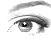

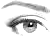

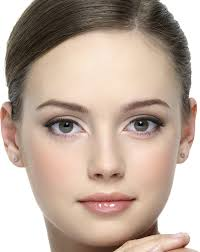

In [ ]:
imgOut = img.copy()

for (x, y, w, h) in eyeRects:
  eyeImage = img [y:y+h, x: x+w]

  blue, green, red = cv2.split(eyeImage)

  bg = cv2.add(blue, green)
  # mask = (red > 150) & (red > bg)
  mask = (red > 50) & (red > bg)
  mask = mask.astype(np.uint8) * 255

  cv2_imshow(bg)

  # Clean up mask by filling holes and dilating
  mask = fillHoles(mask)
  mask = cv2.dilate(mask, None, anchor=(-1, -1), iterations=1, borderType=1, borderValue=1)

  mean = bg / 2
  mask = mask.astype(bool)[:, :, np.newaxis]
  mean = mean[:, :, np.newaxis]

  # Copy the eye from the original image.
  eyeOut = eyeImage.copy()
  eyeOut = eyeOut.astype(np.ndarray) 
  
  # Copy the mean image to the output image.
  np.copyto(eyeOut, mean, where=mask)

  # Copy the fixed eye to the output image.
  imgOut[y:y+h, x:x+w, :] = eyeOut
cv2_imshow(imgOut)